In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

In [2]:
df = pd.read_csv("carML.data", header=None)
header = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']
df = df.rename(columns=dict(zip(df.columns, header)))
le = LabelEncoder()
print(df.head())

  buying  maint doors persons lug_boot safety acceptability
0  vhigh  vhigh     2       2    small    low         unacc
1  vhigh  vhigh     2       2    small    med         unacc
2  vhigh  vhigh     2       2    small   high         unacc
3  vhigh  vhigh     2       2      med    low         unacc
4  vhigh  vhigh     2       2      med    med         unacc


In [3]:
df.isnull().sum()


buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64

In [4]:
df.duplicated().sum()

0

<Axes: xlabel='buying'>

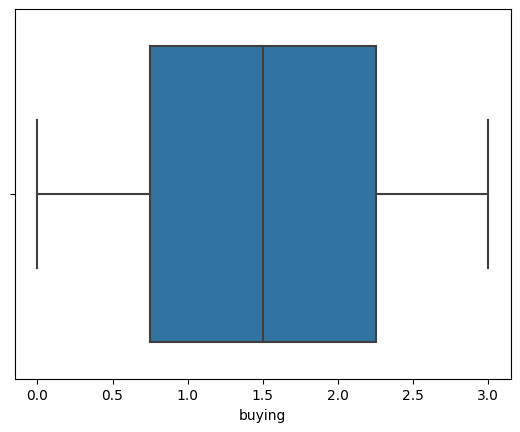

In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
sns.boxplot(x=df["buying"])

In [6]:
print("Buying - Mean:", df["buying"].mean(), " Median:", df["buying"].median(), " Variance:", df["buying"].var(), " Standard Deviation:", df["buying"].std())
print("Maintenance - Mean:", df["maint"].mean(), " Median:", df["maint"].median(), " Variance:", df["maint"].var(), " Standard Deviation:", df["maint"].std())


Buying - Mean: 1.5  Median: 1.5  Variance: 1.2507237984944992  Standard Deviation: 1.1183576344329658
Maintenance - Mean: 1.5  Median: 1.5  Variance: 1.2507237984944992  Standard Deviation: 1.1183576344329658


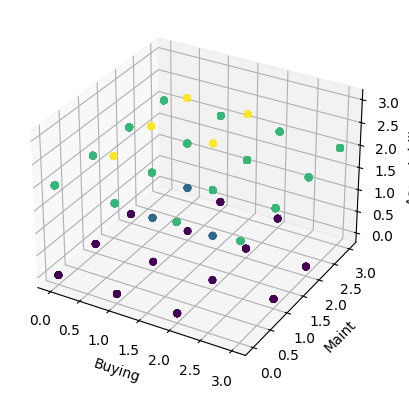

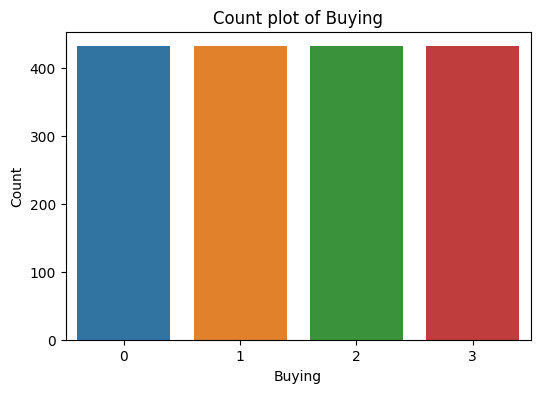

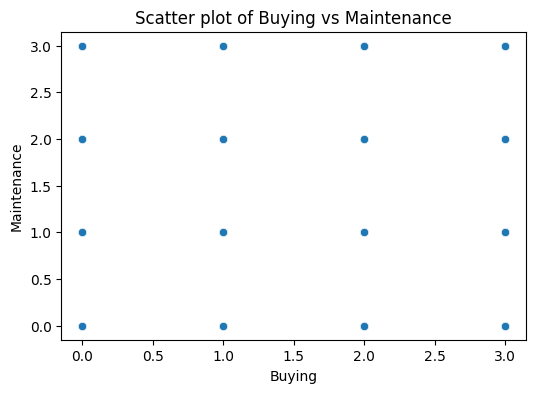

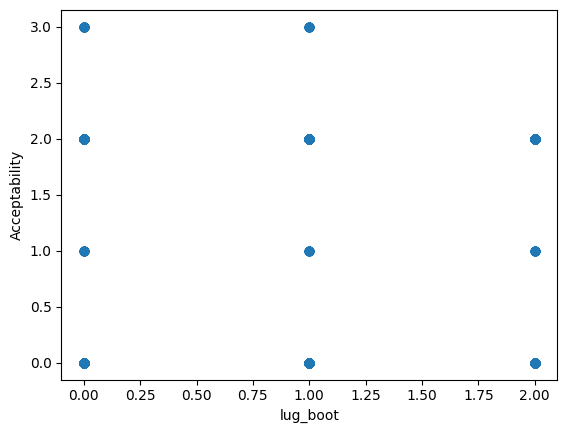

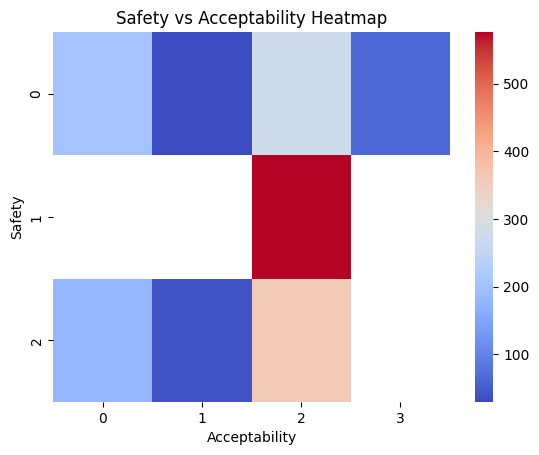

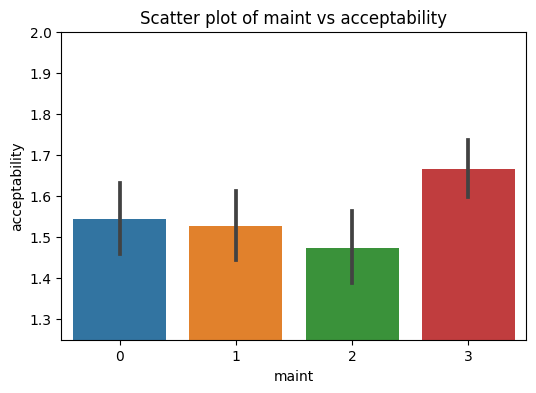

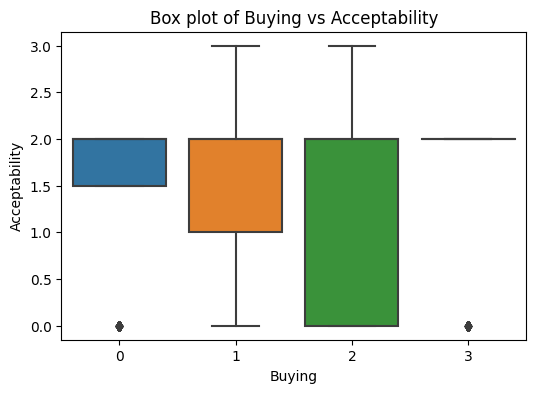

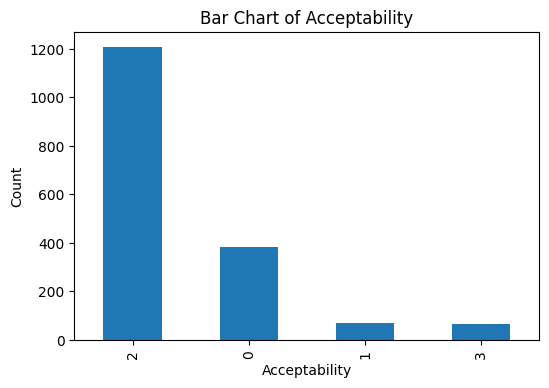

In [15]:
fig = go.Figure(data=[go.Scatter3d(
    x=df['buying'], 
    y=df['maint'],
    z=df['acceptability'],
    mode='markers',
    marker=dict(
        size=4,
        color=df['acceptability'],
        colorscale='Viridis',
        opacity=0.8, 
        colorbar=dict(thickness=20)
    )
)])
fig.update_layout(
    scene=dict(
        xaxis_title='Buying',
        yaxis_title='Maintenance',
        zaxis_title='Acceptability'
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    coloraxis=dict(
        colorbar=dict(
            title='Acceptability',
            tickvals=[0, 1, 2, 3],
            ticktext=['unacc', 'acc', 'good', 'vgood']
        )
    )
)
fig.write_html("3dintergraph.html")
fig.show()

fig = go.Figure(data=[
    go.Scatter3d(
        x=df['buying'], 
        y=df['maint'],
        z=df['acceptability'],
        mode='markers',
        marker=dict(
            size=4,
            color=df['acceptability'],
            colorscale='Viridis',
            opacity=0.8, 
            colorbar=dict(thickness=20)
        )
    ),
    go.Surface(
        x=df['buying'], 
        y=df['maint'],
        z=df['acceptability'],
        colorscale='Viridis',
        showscale=False,
        opacity=0.5
    )
])

fig.update_layout(
    scene=dict(
        xaxis_title='Buying',
        yaxis_title='Maintenance',
        zaxis_title='Acceptability'
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    coloraxis=dict(
        colorbar=dict(
            title='Acceptability',
            tickvals=[0, 1, 2, 3],
            ticktext=['unacc', 'acc', 'good', 'vgood']
        )
    )
)
fig.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['buying'], df['maint'], df['acceptability'], c=df['acceptability'])
ax.set_xlabel('Buying')
ax.set_ylabel('Maint')
ax.set_zlabel('Acceptability')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x="buying", data=df)
plt.title("Count plot of Buying")
plt.xlabel("Buying")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x="buying", y="maint", data=df)
plt.title("Scatter plot of Buying vs Maintenance")
plt.xlabel("Buying")
plt.ylabel("Maintenance")
plt.show()
#----
plt.scatter(x=df['lug_boot'], y=df['acceptability'])

# Set labels for x and y axis
plt.xlabel('lug_boot')
plt.ylabel('Acceptability')

# Show the plot
plt.show()
#---


pivot_table = df.pivot_table(index='safety', columns='acceptability', values='buying', aggfunc='count')
# Create a heatmap
sns.heatmap(pivot_table, annot=False, cmap='coolwarm', cbar=True)
# Set the axis labels and title
plt.xlabel('Acceptability')
plt.ylabel('Safety')
plt.title('Safety vs Acceptability Heatmap')
# Show the plot
plt.show()
#---
#---
plt.figure(figsize=(6, 4))
sns.barplot(x="maint", y="acceptability", data=df)
plt.title("Scatter plot of maint vs acceptability")
plt.xlabel("maint")
plt.ylabel("acceptability")
plt.ylim(1.25, 2)
plt.show()

#----
plt.figure(figsize=(6, 4))
sns.boxplot(x="buying", y="acceptability", data=df)
plt.title("Box plot of Buying vs Acceptability")
plt.xlabel("Buying")
plt.ylabel("Acceptability")
plt.show()

plt.figure(figsize=(6, 4))
df["acceptability"].value_counts().plot(kind='bar')
plt.title("Bar Chart of Acceptability")
plt.xlabel("Acceptability")
plt.ylabel("Count")
plt.show()


In [8]:
df_encoded = pd.get_dummies(df, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [9]:
X = df_encoded.drop('acceptability', axis=1)
y = df_encoded['acceptability']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)
print(X)


      buying_0  buying_1  buying_2  buying_3  maint_0  maint_1  maint_2   
0        False     False     False      True    False    False    False  \
1        False     False     False      True    False    False    False   
2        False     False     False      True    False    False    False   
3        False     False     False      True    False    False    False   
4        False     False     False      True    False    False    False   
...        ...       ...       ...       ...      ...      ...      ...   
1723     False      True     False     False    False     True    False   
1724     False      True     False     False    False     True    False   
1725     False      True     False     False    False     True    False   
1726     False      True     False     False    False     True    False   
1727     False      True     False     False    False     True    False   

      maint_3  doors_0  doors_1  ...  doors_3  persons_0  persons_1   
0        True     True    Fa

In [10]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98
